# **EYE DISEASES CLASSIFICATION AND DETECTION** #

## **Importing module for ML and dataframe** ##

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
import os
import PIL
from tqdm import tqdm

##**Define dataset paths**##

In [ ]:
glaucoma = Path('/content/drive/MyDrive/intern_datasets/dataset/glaucoma')
cataract = Path('/content/drive/MyDrive/intern_datasets/dataset/cataract')
normal = Path('/content/drive/MyDrive/intern_datasets/dataset/normal')
diabetic_retinopathy = Path('/content/drive/MyDrive/intern_datasets/dataset/diabetic_retinopathy')


## **List of disease categories** ##

In [ ]:
disease_type = [glaucoma, cataract, normal, diabetic_retinopathy]
disease_labels = ["Glaucoma", "Cataract", "Normal", "Diabetic Retinopathy"]


## **Create a dataframe** ##

In [ ]:
df = pd.DataFrame()


## **Read images and create DataFrame** ##

In [ ]:
for types in disease_type:
    for imagepath in tqdm(list(types.iterdir()), desc=str(types)):
        df = pd.concat([df, pd.DataFrame({'image': [str(imagepath)], 'disease_type': [disease_type.index(types)]})], ignore_index=True)


/content/drive/MyDrive/intern_datasets/dataset/glaucoma: 100%|██████████| 1007/1007 [00:00<00:00, 1842.21it/s]
/content/drive/MyDrive/intern_datasets/dataset/cataract: 100%|██████████| 1038/1038 [00:00<00:00, 1713.68it/s]
/content/drive/MyDrive/intern_datasets/dataset/normal: 100%|██████████| 1074/1074 [00:00<00:00, 1502.06it/s]
/content/drive/MyDrive/intern_datasets/dataset/diabetic_retinopathy: 100%|██████████| 1134/1134 [00:00<00:00, 1511.32it/s]


In [ ]:
df

,image,disease_type
0,/content/drive/MyDrive/intern_datasets/dataset...,0
1,/content/drive/MyDrive/intern_datasets/dataset...,0
2,/content/drive/MyDrive/intern_datasets/dataset...,0
3,/content/drive/MyDrive/intern_datasets/dataset...,0
4,/content/drive/MyDrive/intern_datasets/dataset...,0
...,...,...
4248,/content/drive/MyDrive/intern_datasets/dataset...,3
4249,/content/drive/MyDrive/intern_datasets/dataset...,3
4250,/content/drive/MyDrive/intern_datasets/dataset...,3
4251,/content/drive/MyDrive/intern_datasets/dataset...,3


## **Shuffle dataset**##

In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,image,disease_type
0,/content/drive/MyDrive/intern_datasets/dataset...,0
1,/content/drive/MyDrive/intern_datasets/dataset...,2
2,/content/drive/MyDrive/intern_datasets/dataset...,2
3,/content/drive/MyDrive/intern_datasets/dataset...,2
4,/content/drive/MyDrive/intern_datasets/dataset...,0
...,...,...
4248,/content/drive/MyDrive/intern_datasets/dataset...,3
4249,/content/drive/MyDrive/intern_datasets/dataset...,0
4250,/content/drive/MyDrive/intern_datasets/dataset...,2
4251,/content/drive/MyDrive/intern_datasets/dataset...,3


##**Display first few rows**##

In [ ]:
print(df.head(50))

                                                image  disease_type
0   /content/drive/MyDrive/intern_datasets/dataset...             0
1   /content/drive/MyDrive/intern_datasets/dataset...             2
2   /content/drive/MyDrive/intern_datasets/dataset...             2
3   /content/drive/MyDrive/intern_datasets/dataset...             2
4   /content/drive/MyDrive/intern_datasets/dataset...             0
5   /content/drive/MyDrive/intern_datasets/dataset...             3
6   /content/drive/MyDrive/intern_datasets/dataset...             0
7   /content/drive/MyDrive/intern_datasets/dataset...             0
8   /content/drive/MyDrive/intern_datasets/dataset...             2
9   /content/drive/MyDrive/intern_datasets/dataset...             0
10  /content/drive/MyDrive/intern_datasets/dataset...             0
11  /content/drive/MyDrive/intern_datasets/dataset...             0
12  /content/drive/MyDrive/intern_datasets/dataset...             3
13  /content/drive/MyDrive/intern_datasets/datas

## **Check for missing values** ##

In [ ]:
print(df.isnull().sum())

image           0
disease_type    0
dtype: int64


## **Check the count of the target label**##

In [ ]:
df.disease_type.value_counts()


,count
disease_type,
3,1134
2,1074
1,1038
0,1007


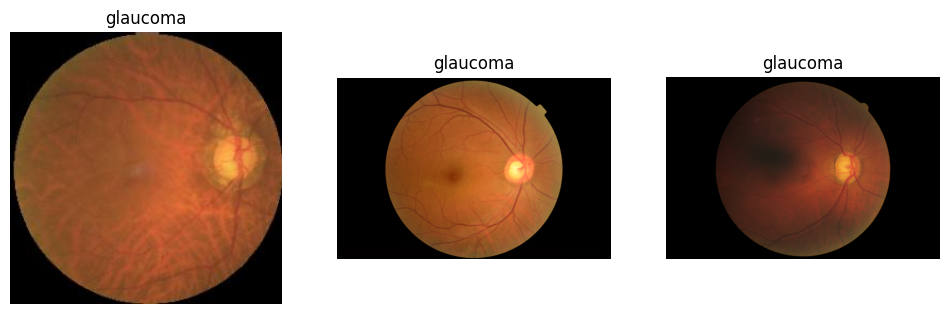

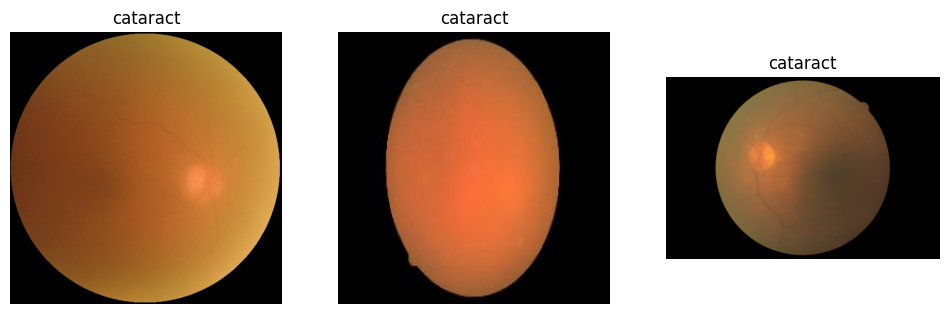

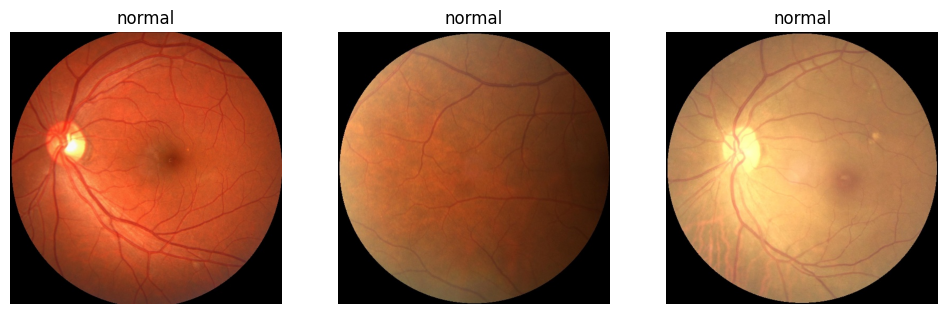

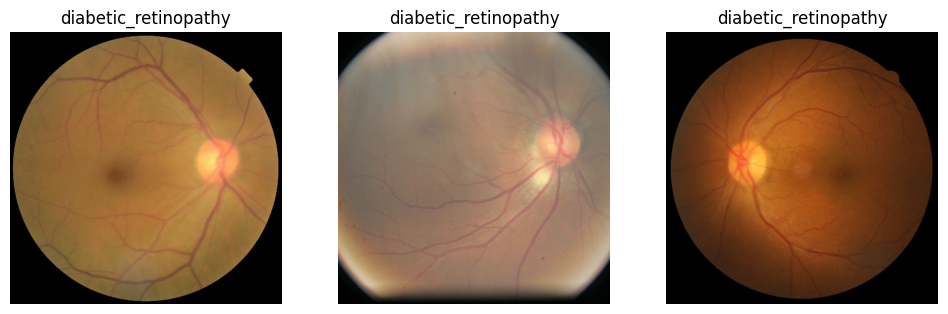

In [ ]:
# define function to plot sample images
def plot_image(n, num_samples=3):
    disease_labels = ['glaucoma', 'cataract', 'normal', 'diabetic_retinopathy']
    images = df[df['disease_type'] == n].sample(num_samples)['image']

    plt.figure(figsize=(12, 12))

    for i, path in enumerate(images, 1):
        img = (plt.imread(path) - plt.imread(path).min()) / plt.imread(path).max()
        plt.subplot(3, 3, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(disease_labels[n])

    plt.show()



plot_image(0)
plot_image(1)
plot_image(2)
plot_image(3)

In [ ]:
# map the labels to the disease type
df['disease_type'] = df['disease_type'].map({0:'glaucoma',1:'cataract',2:'normal',3:'diabetic_retinopathy'})

In [ ]:
# randomising the dataset
df1 = df.sample(frac=1).reset_index(drop=True)

##**Visualizing Class Distribution**##

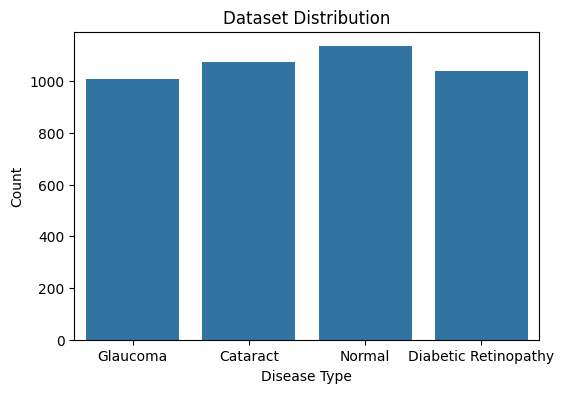

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["disease_type"])
plt.xticks(ticks=[0, 1, 2, 3], labels=disease_labels)
plt.xlabel("Disease Type")
plt.ylabel("Count")
plt.title("Dataset Distribution")
plt.show()

##**Import necessary library**##  

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# augumentation of images
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)

In [ ]:
# create the train data
train_data = datagen.flow_from_dataframe(dataframe=df,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(224,224),
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = True,
                                          subset = 'training')

Found 3403 validated image filenames belonging to 4 classes.


##**Crete validate data**##  

In [ ]:
valid_data = datagen.flow_from_dataframe(dataframe=df1,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(224,224),
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = False,
                                          subset = 'validation')

labels=[key for key in train_data.class_indices]
num_classes = len(disease_type)

model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(224,224, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

Found 850 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,446,756 (24.59 MB)

 Trainable params: 6,446,756 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

##**Fitting the model**##  

In [ ]:
his = model.fit(
  train_data,
    validation_data=valid_data,
  epochs=5
)

Epoch 1/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 922s 9s/step - accuracy: 0.4737 - loss: 1.2658 - val_accuracy: 0.7106 - val_loss: 0.7011
Epoch 2/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.7315 - loss: 0.6406 - val_accuracy: 0.8082 - val_loss: 0.4709
Epoch 3/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.7930 - loss: 0.5088 - val_accuracy: 0.8200 - val_loss: 0.4407
Epoch 4/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.8291 - loss: 0.4320 - val_accuracy: 0.7812 - val_loss: 0.4975
Epoch 5/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.8410 - loss: 0.4105 - val_accuracy: 0.8776 - val_loss: 0.3283


##**Create a plot  of accuracy and val_accuracy for each epoch**##  

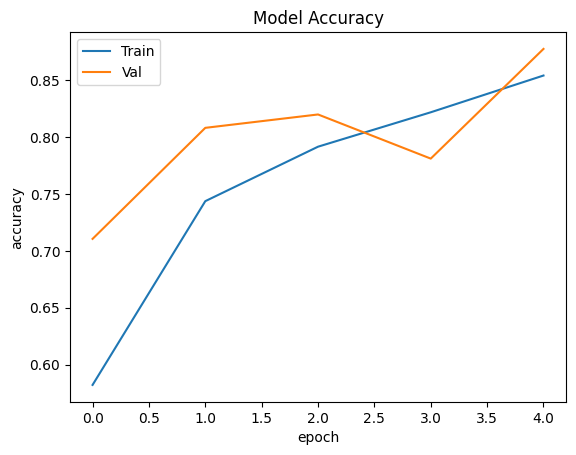

In [ ]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'])
plt.show()

##**Create a plot of loss and var_loss for each epoch**##  

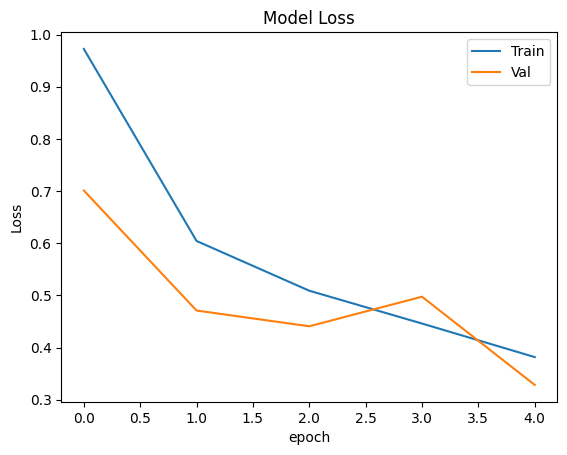

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'])
plt.show()


In [ ]:
confmat = ConfusionMatrix(task="multiclass", num_classes=NUMBER_OF_CLASSES)
cm = confmat(preds, targets)

In [ ]:
# evaluate the model
y_test = valid_data.classes
y_pred = model.predict(valid_data)
y_pred = np.argmax(y_pred,axis=1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 23s 853ms/step


In [ ]:
# generate classification report of the model
print(classification_report(y_test,y_pred,target_names = labels))

                      precision    recall  f1-score   support

            cataract       0.77      0.95      0.85       199
diabetic_retinopathy       0.99      1.00      1.00       222
            glaucoma       0.83      0.73      0.77       195
              normal       0.88      0.79      0.83       234

            accuracy                           0.87       850
           macro avg       0.87      0.87      0.86       850
        weighted avg       0.87      0.87      0.87       850

